# Synthetic Data Examples

In [11]:
# Uncomment the following line when running on Google Colab
# !pip install "autora"

Load the Weber-Fechner Law:

In [12]:
import numpy as np
from autora.experiment_runner.synthetic.psychophysics.weber_fechner_law import weber_fechner_law
s = weber_fechner_law()

Check the docstring to get information about the model

In [13]:
help(weber_fechner_law)

Help on function weber_fechner_law in module autora.experiment_runner.synthetic.psychophysics.weber_fechner_law:

weber_fechner_law(name='Weber-Fechner Law', resolution=100, constant=1.0, maximum_stimulus_intensity=5.0)
    Weber-Fechner Law
    
    Args:
        name: name of the experiment
        resolution: number of allowed values for stimulus 1 and 2
        constant: constant multiplier
        maximum_stimulus_intensity: maximum value for stimulus 1 and 2
    
    Examples:
        >>> experiment = weber_fechner_law()
    
        # The runner can accept numpy arrays or pandas DataFrames, but the return value will
        # always be a pandas DataFrame.
        >>> experiment.run(np.array([[.1,.2]]), random_state=42)
            S1   S2  difference_detected
        0  0.1  0.2             0.696194
    
        >>> experiment.run(pd.DataFrame({'S1': [0.1], 'S2': [0.2]}), random_state=42)
            S1   S2  difference_detected
        0  0.1  0.2             0.696194



... or use the describe function:

In [14]:
from autora.experiment_runner.synthetic.utilities import describe

print(describe(s))


    Weber-Fechner Law

    Args:
        name: name of the experiment
        resolution: number of allowed values for stimulus 1 and 2
        constant: constant multiplier
        maximum_stimulus_intensity: maximum value for stimulus 1 and 2

    Examples:
        >>> experiment = weber_fechner_law()

        # The runner can accept numpy arrays or pandas DataFrames, but the return value will
        # always be a pandas DataFrame.
        >>> experiment.run(np.array([[.1,.2]]), random_state=42)
            S1   S2  difference_detected
        0  0.1  0.2             0.696194

        >>> experiment.run(pd.DataFrame({'S1': [0.1], 'S2': [0.2]}), random_state=42)
            S1   S2  difference_detected
        0  0.1  0.2             0.696194

    


The synthetic experiement `s` has properties like the name of the experiment:

In [15]:
s.name

'Weber-Fechner Law'

... a valid metadata description:

In [16]:
s.variables

VariableCollection(independent_variables=[IV(name='S1', value_range=(0.01, 5.0), allowed_values=array([0.01      , 0.06040404, 0.11080808, 0.16121212, 0.21161616,
       0.2620202 , 0.31242424, 0.36282828, 0.41323232, 0.46363636,
       0.5140404 , 0.56444444, 0.61484848, 0.66525253, 0.71565657,
       0.76606061, 0.81646465, 0.86686869, 0.91727273, 0.96767677,
       1.01808081, 1.06848485, 1.11888889, 1.16929293, 1.21969697,
       1.27010101, 1.32050505, 1.37090909, 1.42131313, 1.47171717,
       1.52212121, 1.57252525, 1.62292929, 1.67333333, 1.72373737,
       1.77414141, 1.82454545, 1.87494949, 1.92535354, 1.97575758,
       2.02616162, 2.07656566, 2.1269697 , 2.17737374, 2.22777778,
       2.27818182, 2.32858586, 2.3789899 , 2.42939394, 2.47979798,
       2.53020202, 2.58060606, 2.6310101 , 2.68141414, 2.73181818,
       2.78222222, 2.83262626, 2.8830303 , 2.93343434, 2.98383838,
       3.03424242, 3.08464646, 3.13505051, 3.18545455, 3.23585859,
       3.28626263, 3.33666667, 3.

... a function to generate the full domain of the data (if possible)

In [17]:
x = s.domain()
x

... the experiment_runner which can be called to generate experimental results:

In [18]:
import numpy as np
y = s.run(x)  # doctest: +ELLIPSIS
y

array([[0.01      , 0.01      ],
       [0.01      , 0.06040404],
       [0.01      , 0.11080808],
       ...,
       [4.94959596, 4.94959596],
       [4.94959596, 5.        ],
       [5.        , 5.        ]])

... a function to plot the ground truth:

In [19]:
s.plotter()

,S1,S2,difference_detected
0,0.010000,0.010000,-0.005815
1,0.010000,0.060404,1.782883
2,0.010000,0.110808,2.398774
3,0.010000,0.161212,2.780492
4,0.010000,0.211616,3.046934
...,...,...,...
5045,4.899192,4.949596,0.011407
5046,4.899192,5.000000,0.008136
5047,4.949596,4.949596,-0.002980
5048,4.949596,5.000000,-0.000581


... against a fitted model if it exists:

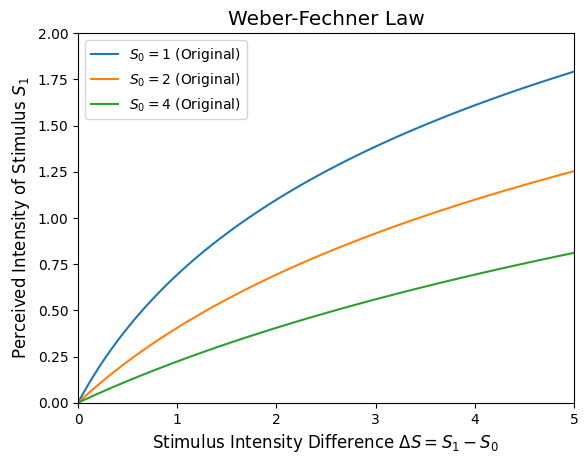

In [20]:
from sklearn.linear_model import LinearRegression
model = LinearRegression().fit(x, y)
s.plotter(model)

We can wrap this functions to use with the state logic of AutoRA:
First, we create the state with the variables:

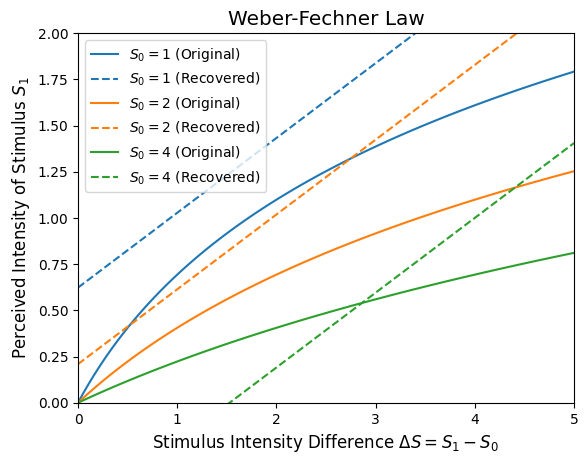

In [21]:
from autora.state import StandardState, on_state, experiment_runner_on_state, estimator_on_state
from autora.experimentalist.grid import grid_pool
from autora.experimentalist.random import random_sample
from functools import partial
import random

# We can get the variables from the runner
variables = s.variables

# With the variables, we initialize a StandardState
state = StandardState(variables)

Wrap the experimentalists in `on_state` function to use them on state:

In [23]:
# Wrap the functions to use on state
# Experimentalists:
pool_on_state = on_state(grid_pool, output=['conditions'])
sample_on_state = on_state(random_sample, output=['conditions'])

state = pool_on_state(state)
state = sample_on_state(state, num_samples=20)
print(state.conditions)

Wrap the runner with the `experiment_runner_on_state` wrapper to use it on state:

In [24]:
# Runner:
run_on_state = experiment_runner_on_state(s.run)
state = run_on_state(state)

state.experiment_data

            S1        S2
1267  0.614848  3.387071
544   0.262020  2.227778
5401  2.731818  0.060404
1120  0.564444  1.018081
5469  2.731818  3.487879
8337  4.193535  1.874949
6560  3.286263  3.034242
5432  2.731818  1.622929
644   0.312424  2.227778
8874  4.445556  3.739899
163   0.060404  3.185455
6114  3.084646  0.715657
3789  1.874949  4.495960
5197  2.580606  4.899192
3468  1.723737  3.437475
2678  1.320505  3.941515
3275  1.622929  3.790303
8184  4.092727  4.243939
772   0.362828  3.639091
8410  4.243939  0.514040


Wrap the regressor with the `estimator_on_state` wrapper:

In [25]:
theorist = LinearRegression()
theorist_on_state = estimator_on_state(theorist)

state = theorist_on_state(state)
# Access the last model:
model = state.models[-1]


print(f"I = "
      f"{model.coef_[0][0]:.2f}*S0 "
      f"{model.coef_[0][1]:+.2f}*S1 "
      f"{model.intercept_[0]:+.2f} ")

,S1,S2,difference_detected
1267,0.614848,3.387071,1.695802
544,0.262020,2.227778,2.146260
5401,2.731818,0.060404,-3.822774
1120,0.564444,1.018081,0.596201
5469,2.731818,3.487879,0.234643
8337,4.193535,1.874949,-0.811834
6560,3.286263,3.034242,-0.071182
5432,2.731818,1.622929,-0.524767
644,0.312424,2.227778,1.984785
8874,4.445556,3.739899,-0.157984
